# Problem Statement:
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as **'Hot Leads'**. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## Business Goal:
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Import Libraries:

In [1]:
# Import important libraries and warnings:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing libraries for modelling:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

### Load the dataframe "Leads" as "df":

In [3]:
# Read dataframe as df:
df = pd.read_csv("Leads.csv")

In [4]:
pd.set_option("max_colwidth", 60) #to display max 130 the columns.
pd.set_option("display.max_rows", 1000) #to display max 1000 rows.

### Steps:
- Reading & Understanding Data.
- Data Preparation for Modelling.
- Model Building.
- Model Evaluation & Predictions

### Step 1: Reading & Understanding Data.
**1. Checking shape, data types & basic Statistical info of the df.**<br>
**2. Data Cleaning:**
- Delete columns having null values more than 40%.
- Check and handle null values.
- Drop redundant columns.
- Outliers Treatment.
- EDA

In [5]:
# Checking head of df:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# Checking no. of rows X no. of columns:
df.shape

(9240, 37)

In [7]:
# Checking information of each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Checking basic statistical information:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Handling Missing Values(NaN):

In [9]:
# Replacing "Select" as "NaN" in all the columns using numpy:
df = df.replace("Select", np.nan)

In [10]:
# Checking percentage of null values in each column:
null_cols = df.isnull().mean()
null_cols

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
How did you hear about X Education               0.784632
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

In [11]:
# Dropping columns with null values more than 0.40.
df.drop(null_cols[null_cols > 0.40].index, axis=1, inplace=True)

In [12]:
# Checking percentage of each distinct values:
df["Lead Origin"].value_counts(normalize = True, dropna=False)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [13]:
# Checking percentage of each distinct values:
df["Lead Source"].value_counts(normalize = True, dropna=False)

Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

In [14]:
# Replacing NaN with Others and merging same category:
df["Lead Source"] = df["Lead Source"].replace(np.nan, "Others")

df["Lead Source"] = df["Lead Source"].replace("google", "Google")
df["Lead Source"] = df["Lead Source"].replace("Facebook", "Social Media")
df["Lead Source"] = df["Lead Source"].replace(["bing", "Click2call", "Press_Release", "Live Chat", "youtubechannel", "testone",
                                               "Pay per Click Ads", "welearnblog_Home", "WeLearn", "blog", "NC_EDM"]
                                              , "Others")

df["Lead Source"].value_counts(normalize = True, dropna=False)

Google              0.310931
Direct Traffic      0.275216
Olark Chat          0.189935
Organic Search      0.124892
Reference           0.057792
Welingak Website    0.015368
Referral Sites      0.013528
Social Media        0.006169
Others              0.006169
Name: Lead Source, dtype: float64

In [15]:
# Checking percentage of each distinct values:
df["Do Not Email"].value_counts(normalize = True, dropna=False)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [16]:
# Checking percentage of each distinct values:
df["Do Not Call"].value_counts(normalize = True, dropna=False)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

In [17]:
# Checking percentage of each distinct values:
df["Converted"].value_counts(normalize = True, dropna=False)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

In [18]:
# Checking percentage of each distinct values:
df["Last Activity"].value_counts(normalize = True, dropna=False)

Email Opened                    0.371970
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
NaN                             0.011147
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Received                  0.000216
Email Marked Spam               0.000216
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: Last Activity, dtype: float64

In [19]:
# Replacing NaN with Others and merging same category:
df["Last Activity"] = df["Last Activity"].replace(np.nan, "Others")
df["Last Activity"] = df["Last Activity"].replace(["Unreachable","Unsubscribed","Had a Phone Conversation","Approached upfront",
                                                  "View in browser link Clicked","Email Received","Email Marked Spam",
                                                  "Visited Booth in Tradeshow", "Resubscribed to emails"]
                                                  , "Others")

df["Last Activity"].value_counts(normalize = True, dropna=False)

Email Opened                 0.371970
SMS Sent                     0.297078
Olark Chat Conversation      0.105303
Page Visited on Website      0.069264
Converted to Lead            0.046320
Email Bounced                0.035281
Others                       0.033333
Email Link Clicked           0.028896
Form Submitted on Website    0.012554
Name: Last Activity, dtype: float64

In [20]:
# Checking percentage of each distinct values:
df["Country"].value_counts(normalize = True, dropna=False)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

In [21]:
# Checking percentage of each distinct values:
df["Specialization"].value_counts(normalize = True, dropna=False)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [22]:
# Replacing NaN with Not-Specified & there are lot of fields under management which we will combine into management:
df["Specialization"] = df["Specialization"].replace(np.nan, "Not Specified")

df["Specialization"] = df["Specialization"].replace(["Finance Management", "Human Resource Management", "Marketing Management",
                                                    "Operations Management", "IT Projects Management","Supply Chain Management",
                                                    "Healthcare Management", "Hospitality Management", "Retail Management"]
                                                    , "Management")

In [23]:
# Checking percentage of each distinct values after replacing values:
df["Specialization"].value_counts(normalize = True, dropna=False)

Management                           0.460281
Not Specified                        0.365801
Business Administration              0.043615
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
E-COMMERCE                           0.012121
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [24]:
# Checking percentage of each distinct values:
df["What is your current occupation"].value_counts(normalize = True, dropna=False)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [25]:
# Replacing NaN with Unemployed:
df["What is your current occupation"] = df["What is your current occupation"].replace(np.nan, "Unemployed")
df["What is your current occupation"].value_counts(normalize = True, dropna=False)

Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [26]:
# Checking percentage of each distinct values:
df["What matters most to you in choosing a course"].value_counts(normalize = True, dropna=False)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

In [27]:
# Checking percentage of each distinct values:
df["Search"].value_counts(normalize = True, dropna=False)

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

In [28]:
# Checking percentage of each distinct values:
df["Magazine"].value_counts(normalize = True, dropna=False)

No    1.0
Name: Magazine, dtype: float64

In [29]:
# Checking percentage of each distinct values:
df["Newspaper Article"].value_counts(normalize = True, dropna=False)

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

In [30]:
# Checking percentage of each distinct values:
df["X Education Forums"].value_counts(normalize = True, dropna=False)

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

In [31]:
# Checking percentage of each distinct values:
df["Newspaper"].value_counts(normalize = True, dropna=False)

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64

In [32]:
# Checking percentage of each distinct values:
df["Digital Advertisement"].value_counts(normalize = True, dropna=False)

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

In [33]:
# Checking percentage of each distinct values:
df["Through Recommendations"].value_counts(normalize = True, dropna=False)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

In [34]:
# Checking percentage of each distinct values:
df["Receive More Updates About Our Courses"].value_counts(normalize = True, dropna=False)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [35]:
# Checking percentage of each distinct values:
df["Tags"].value_counts(normalize = True, dropna=False)

NaN                                                  0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

In [36]:
# Replacing NaN with Not-Specified:
df["Tags"] = df["Tags"].replace(np.nan, "Not Specified")

df["Tags"] = df["Tags"].replace(["Interested in other courses","Closed by Horizzon","switched off","Busy","Lost to EINS",
                                 "Not doing further education","Interested  in full time MBA","Graduation in progress",
                                 "invalid number","Diploma holder (Not Eligible)","wrong number given", "opp hangup", 
                                 "number not provided","in touch with EINS","Lost to Others","Still Thinking","Lateral student",
                                "Want to take admission but has financial problems","In confusion whether part time or DLP",
                                "Interested in Next batch","Shall take in the next coming month","University not recognized",
                                "Recognition issue (DEC approval)"]
                                , "Other")

df["Tags"].value_counts(normalize = True, dropna=False)

Not Specified                          0.362879
Other                                  0.232359
Will revert after reading the email    0.224242
Ringing                                0.130195
Already a student                      0.050325
Name: Tags, dtype: float64

In [37]:
# Checking percentage of each distinct values:
df["Update me on Supply Chain Content"].value_counts(normalize = True, dropna=False)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [38]:
# Checking percentage of each distinct values:
df["Get updates on DM Content"].value_counts(normalize = True, dropna=False)

No    1.0
Name: Get updates on DM Content, dtype: float64

In [39]:
# Checking percentage of each distinct values:
df["City"].value_counts(normalize = True, dropna=False)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [40]:
# Replacing NaN with Mumbai:
df["City"] = df["City"].replace(np.nan, "Mumbai")

df["City"].value_counts(normalize = True, dropna=False)

Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [41]:
# Checking percentage of each distinct values:
df["I agree to pay the amount through cheque"].value_counts(normalize = True, dropna=False)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

In [42]:
# Checking percentage of each distinct values:
df["A free copy of Mastering The Interview"].value_counts(normalize = True, dropna=False)

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

In [43]:
# Checking percentage of each distinct values:
df["Last Notable Activity"].value_counts(normalize = True, dropna=False)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Email Received                  0.000108
Name: Last Notable Activity, dtype: float64

In [44]:
# Merging some common categories into Others:
df["Last Notable Activity"] = df["Last Notable Activity"].replace(["Email Bounced", "Unsubscribed", "Unreachable", 
                                                                   "Had a Phone Conversation","Email Marked Spam", 
                                                                   "Approached upfront", "Resubscribed to emails",
                                                                   "View in browser link Clicked", "Form Submitted on Website", 
                                                                   "Email Received"]
                                                                  , "Others")

df["Last Notable Activity"].value_counts(normalize = True, dropna=False)

Modified                   0.368723
Email Opened               0.305952
SMS Sent                   0.235065
Page Visited on Website    0.034416
Olark Chat Conversation    0.019805
Email Link Clicked         0.018723
Others                     0.017316
Name: Last Notable Activity, dtype: float64

#### Dropping Redundant Variables:
- Here most columns have category of yes/no with value count more than 95% which does not make sense in model building, so we are going to drop those columns.
- Country column has category India with 70% and NaN with 26% so this attribute is also of no use, so drop it.
- Prospect ID & Lead Number are also not useful in model building so drop these as well.
- There are other redundant columns which we will drop.

In [45]:
redundant_vars = ["Prospect ID", "Lead Number", "Do Not Call", "Country", "What matters most to you in choosing a course",
                  "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement",
                  "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content",
                  "Get updates on DM Content", "I agree to pay the amount through cheque"]

df = df.drop(redundant_vars, axis=1)

In [46]:
# Rechecking null values:
df.isnull().mean()

Lead Origin                               0.000000
Lead Source                               0.000000
Do Not Email                              0.000000
Converted                                 0.000000
TotalVisits                               0.014827
Total Time Spent on Website               0.000000
Page Views Per Visit                      0.014827
Last Activity                             0.000000
Specialization                            0.000000
What is your current occupation           0.000000
Tags                                      0.000000
City                                      0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [47]:
# Since NaN value is now less than 3% so we can drop all the rows having NaN values as it will not affect the model:
df = df.dropna()

In [48]:
# Rechecking null values:
df.isnull().mean()

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [49]:
# Checking shape of dataframe after cleaning:
df.shape

(9103, 14)

#### Outliers Treatment:

In [50]:
# Checking percentile for continuous variable:
df["TotalVisits"].describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
1%          0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

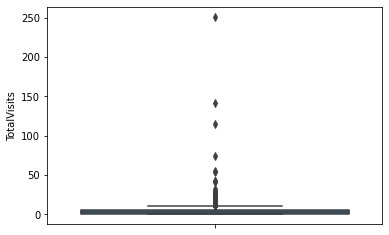

In [51]:
# Visualising Outliers:
sns.boxplot(y=df["TotalVisits"])
plt.show()

In [52]:
# Remove top and bottom 1% quantiles from column:
q1 = df["TotalVisits"].quantile(0.01)
q3 = df["TotalVisits"].quantile(0.99)

df = df[df["TotalVisits"] >= q1]
df = df[df["TotalVisits"] <= q3]

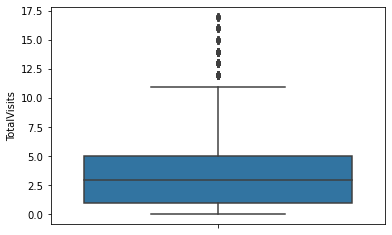

In [53]:
# Visualising Outliers after outlier treatment:
sns.boxplot(y=df["TotalVisits"])
plt.show()

In [54]:
# Checking percentile for continuous variable:
df["Total Time Spent on Website"].describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
1%          0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

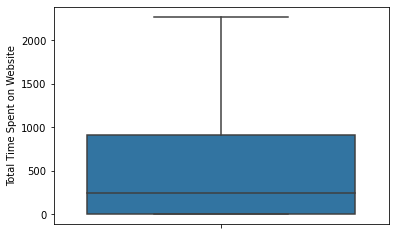

In [55]:
# Visualising Outliers:
sns.boxplot(y=df["Total Time Spent on Website"])
plt.show()

- No outliers present in attribute "Total Time Spent on Website".

In [56]:
# Checking percentile for continuous variable:
df["Page Views Per Visit"].describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
1%          0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

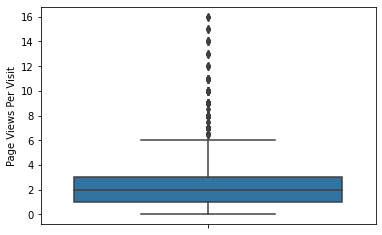

In [57]:
# Visualising Outliers:
sns.boxplot(y=df["Page Views Per Visit"])
plt.show()

In [58]:
# Remove top and bottom 1% quantiles from column:
q1 = df["Page Views Per Visit"].quantile(0.01)
q3 = df["Page Views Per Visit"].quantile(0.99)

df = df[df["Page Views Per Visit"] >= q1]
df = df[df["Page Views Per Visit"] <= q3]

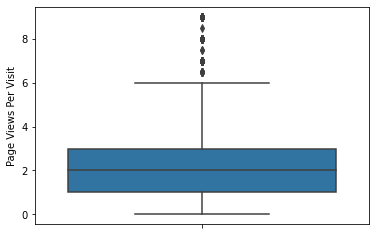

In [59]:
# Visualising Outliers after outlier treatment:
sns.boxplot(y=df["Page Views Per Visit"])
plt.show()

In [60]:
# Percentage of rows retained in cleaning process:
round(((len(df.index))/9240)*100, 2)

96.89

### EDA:

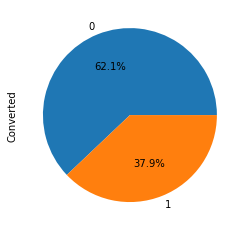

In [61]:
# Checking & plotting conversion rate:
df.Converted.value_counts(normalize=True).plot.pie(autopct="%.1f%%")
plt.show()

***Conversion rate is approx 38%.***

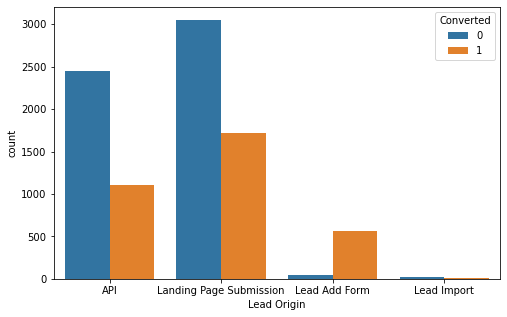

In [62]:
# Plotting countplot for categorical variables:
plt.figure(figsize = (8, 5))
sns.countplot(x="Lead Origin", hue="Converted", data=df)

plt.show()

- Lead add form have high lead conversion rate.
- API & Landing Page Submission generates most leads.

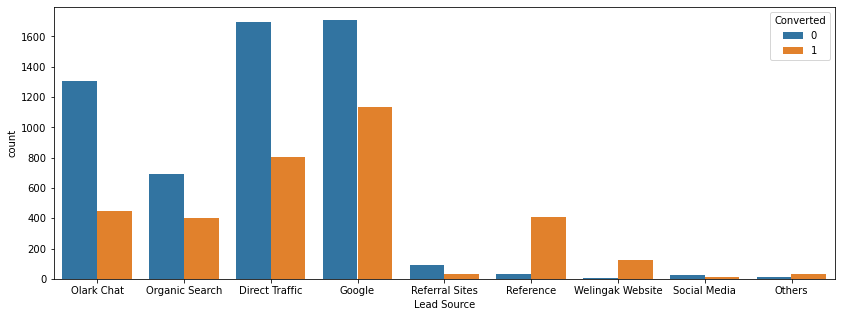

In [63]:
# Plotting countplot for categorical variables:
plt.figure(figsize = (14, 5))
sns.countplot(x="Lead Source", hue="Converted", data=df)

plt.show()

- Reference leads and welingak website leads have high chances for conversion.
- Google and Direct traffic generates most leads.

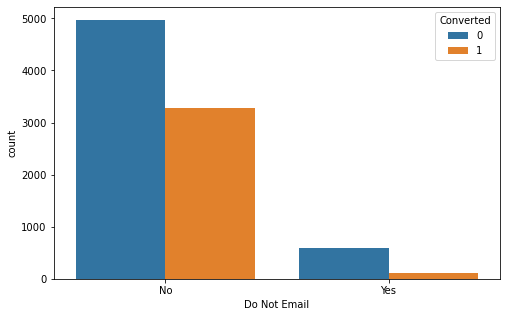

In [64]:
# Plotting countplot for categorical variables:
plt.figure(figsize = (8, 5))
sns.countplot(x="Do Not Email", hue="Converted", data=df)

plt.show()

- People who opted for email have most number of leads.

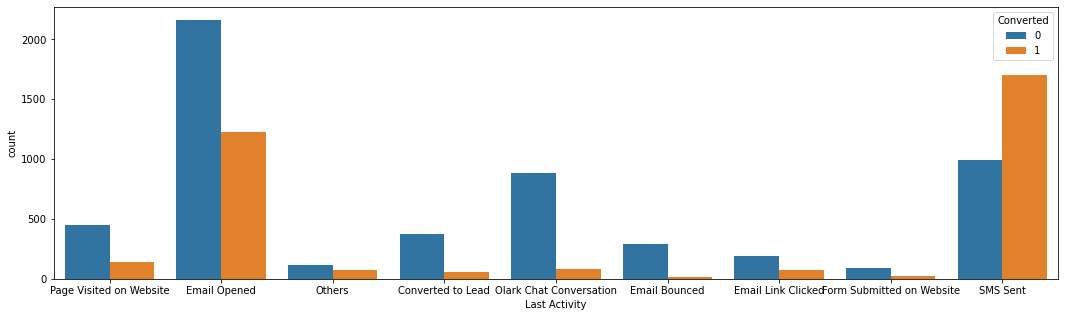

In [65]:
# Plotting countplot for categorical variables:
plt.figure(figsize = (18, 5))
sns.countplot(x="Last Activity", hue="Converted", data=df)

plt.show()

- Leads whose last activity is SMS sent have higher chances for conversion.
- Leads whose last activity is to have olark chat conversation are more likely to not convert.

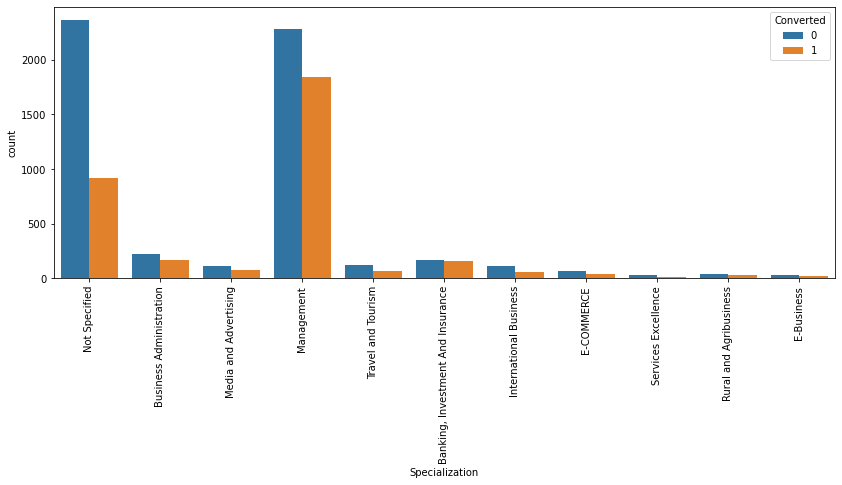

In [66]:
# Plotting countplot for categorical variables:
plt.figure(figsize = (14, 5))

sp=sns.countplot(df.Specialization, hue=df.Converted)
sp.set_xticklabels(sp.get_xticklabels(), rotation=90)

plt.show()

- People with Management as specialization tends to have more lead and more likely to convert. So this is an important variable in modelling.

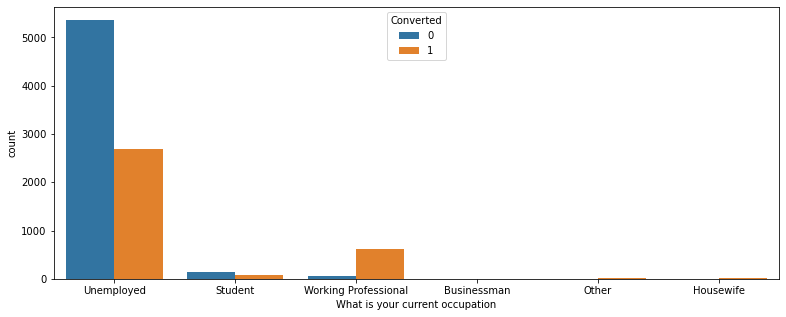

In [67]:
# Plotting countplot for categorical variables:
plt.figure(figsize = (13, 5))
sns.countplot(x="What is your current occupation", hue="Converted", data=df)

plt.show()

- Working professional have high chances for conversion.
- Unemployed leads have high chance for not converting into hot leads.

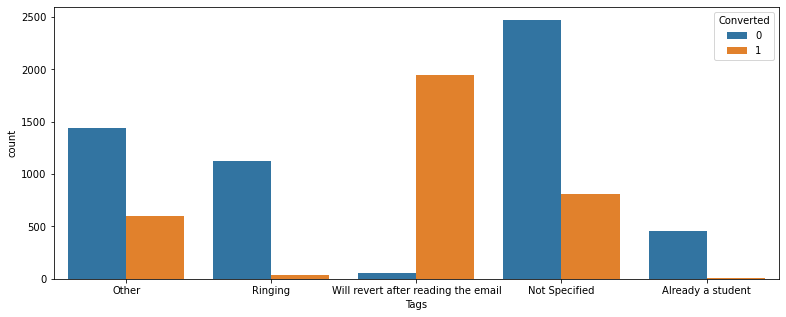

In [68]:
# Plotting countplot for categorical variables:
plt.figure(figsize = (13, 5))
sns.countplot(x="Tags", hue="Converted", data=df)

plt.show()

- Tags with "will revert after reading mail" are more likely to convert.

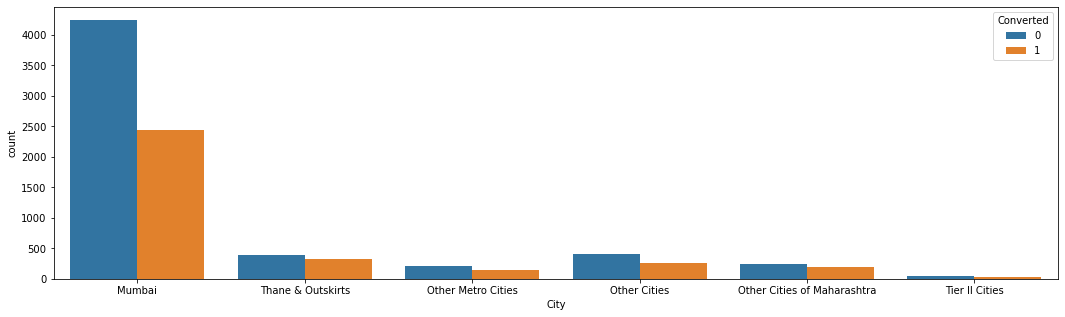

In [69]:
# Plotting countplot for categorical variables:
plt.figure(figsize = (18, 5))
sns.countplot(x="City", hue="Converted", data=df)

plt.show()

- Mostly leads are from Mumbai.

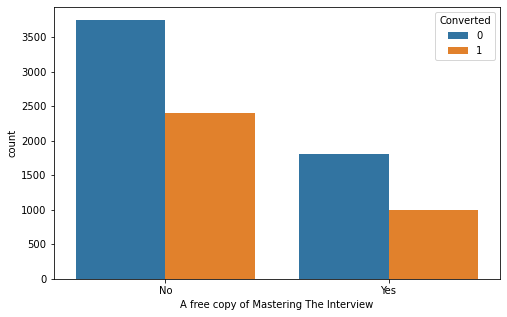

In [70]:
# Plotting countplot for categorical variables:
plt.figure(figsize = (8, 5))
sns.countplot(x="A free copy of Mastering The Interview", hue="Converted", data=df)

plt.show()

- Mostly leads are those who have not opted for a free copy of Mastering The Interview.

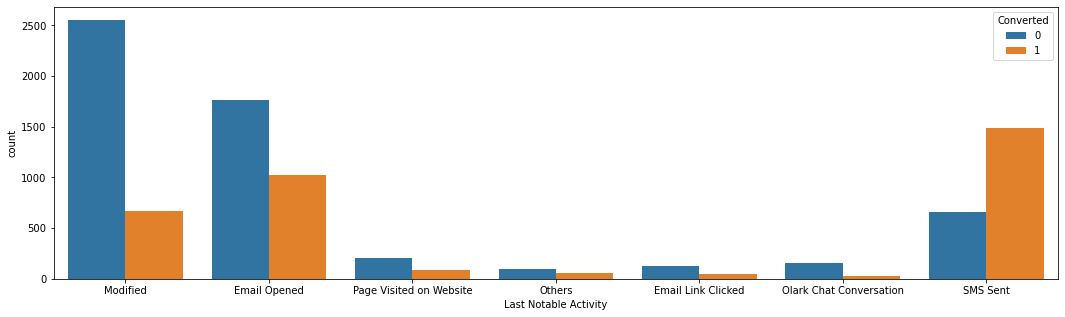

In [71]:
# Plotting countplot for categorical variables:
plt.figure(figsize = (18, 5))
sns.countplot(x="Last Notable Activity", hue="Converted", data=df)

plt.show()

- Leads whose last notable activity is SMS sent have higher chances of conversion.
- Leads whose last notable activity is modified have high chances for not converting.

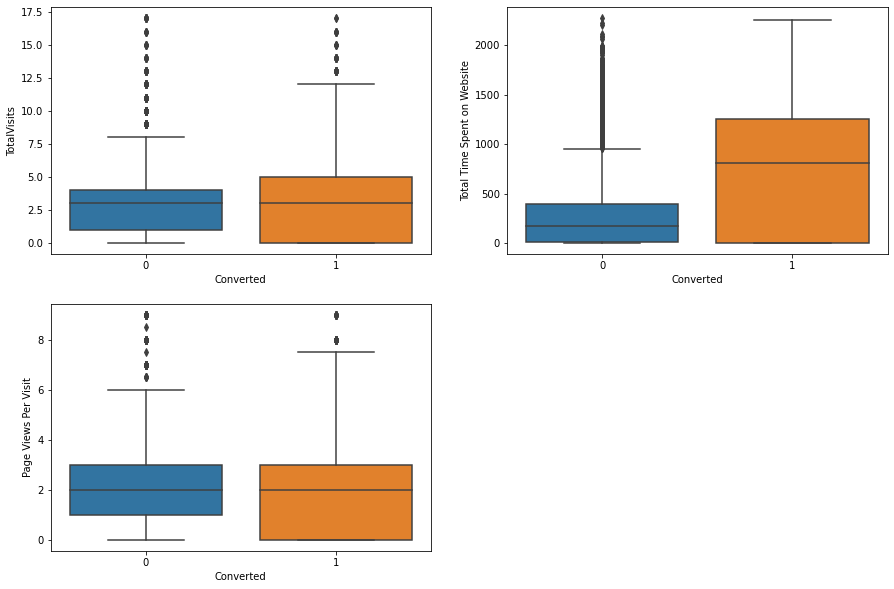

In [72]:
# Plotting boxplot for all numerical variables:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x = "Converted", y = "TotalVisits", data = df)

plt.subplot(2,2,2)
sns.boxplot(x = "Converted", y = "Total Time Spent on Website", data = df)

plt.subplot(2,2,3)
sns.boxplot(x = "Converted", y = "Page Views Per Visit", data = df)

plt.show()

- Leads spending more time on website have high chances of conversion.

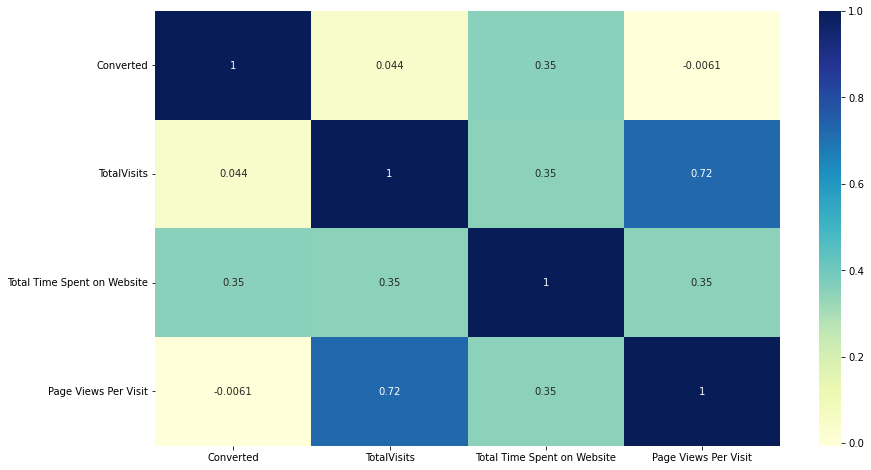

In [73]:
# Checking correlations between variables:
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

- Total visits & Page Views per visit have highest correlation.
- Converted have maximum correlation with Total Time Spent on Website.
- Converted have negative correlation with Page Views Per Visit.

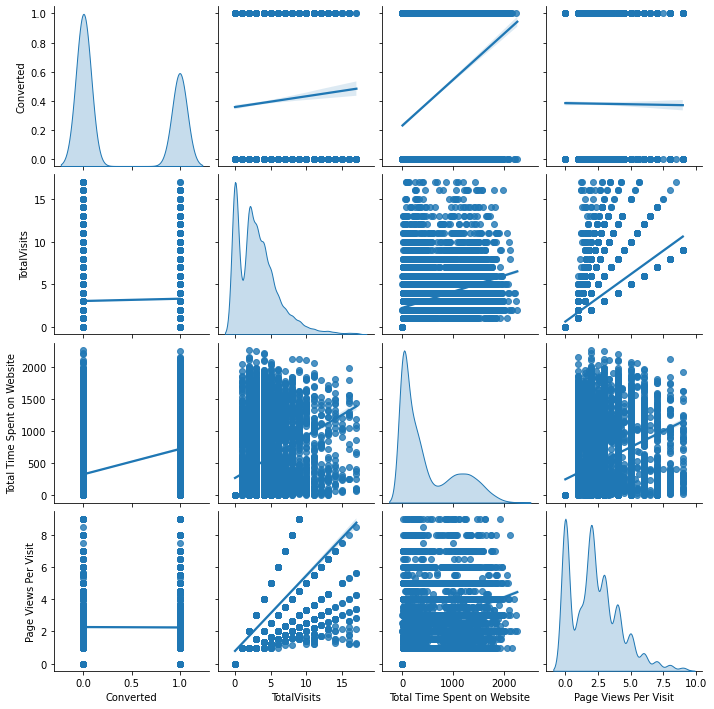

In [74]:
# Plotting numerical variables to check correlation between various variables:
sns.pairplot(df, kind="reg", diag_kind = "kde")
plt.show()

### Step 2: Data Preparation.
- Mapping binary variables into 0 & 1.
- Creating dummy variables for all categorical variables.
- Train-Test split.
- Feature scaling.

#### Mapping Binary Variables:

In [75]:
# Mapping binary categorical variable into 0 & 1:
df["Do Not Email"] = df["Do Not Email"].map({"Yes":1, "No":0})

df["A free copy of Mastering The Interview"] = df["A free copy of Mastering The Interview"].map({"Yes":1, "No":0})

#### Creating Dummy Variables:

In [76]:
# Getting list of all categorical columns:
cols = df.loc[:, df.dtypes == "object"]
cols.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [77]:
# Creating dummy variable for all categorical variables:
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation', 
                           'Tags', 'City', 'Last Notable Activity']], drop_first=True)

In [78]:
# Merging dummy variables with original dataframe in a new dataframe:
df_1 = pd.concat([df, dummy], axis = 1)

In [79]:
# Dropping categorical variables as we already have dummy vraiables for them:
df_1.drop(cols, axis = 1, inplace = True)
df_1.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [80]:
# Checking data types of all variables:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 55 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          8953 non-null   int64  
 1   Converted                                             8953 non-null   int64  
 2   TotalVisits                                           8953 non-null   float64
 3   Total Time Spent on Website                           8953 non-null   int64  
 4   Page Views Per Visit                                  8953 non-null   float64
 5   A free copy of Mastering The Interview                8953 non-null   int64  
 6   Lead Origin_Landing Page Submission                   8953 non-null   uint8  
 7   Lead Origin_Lead Add Form                             8953 non-null   uint8  
 8   Lead Origin_Lead Import                               8953

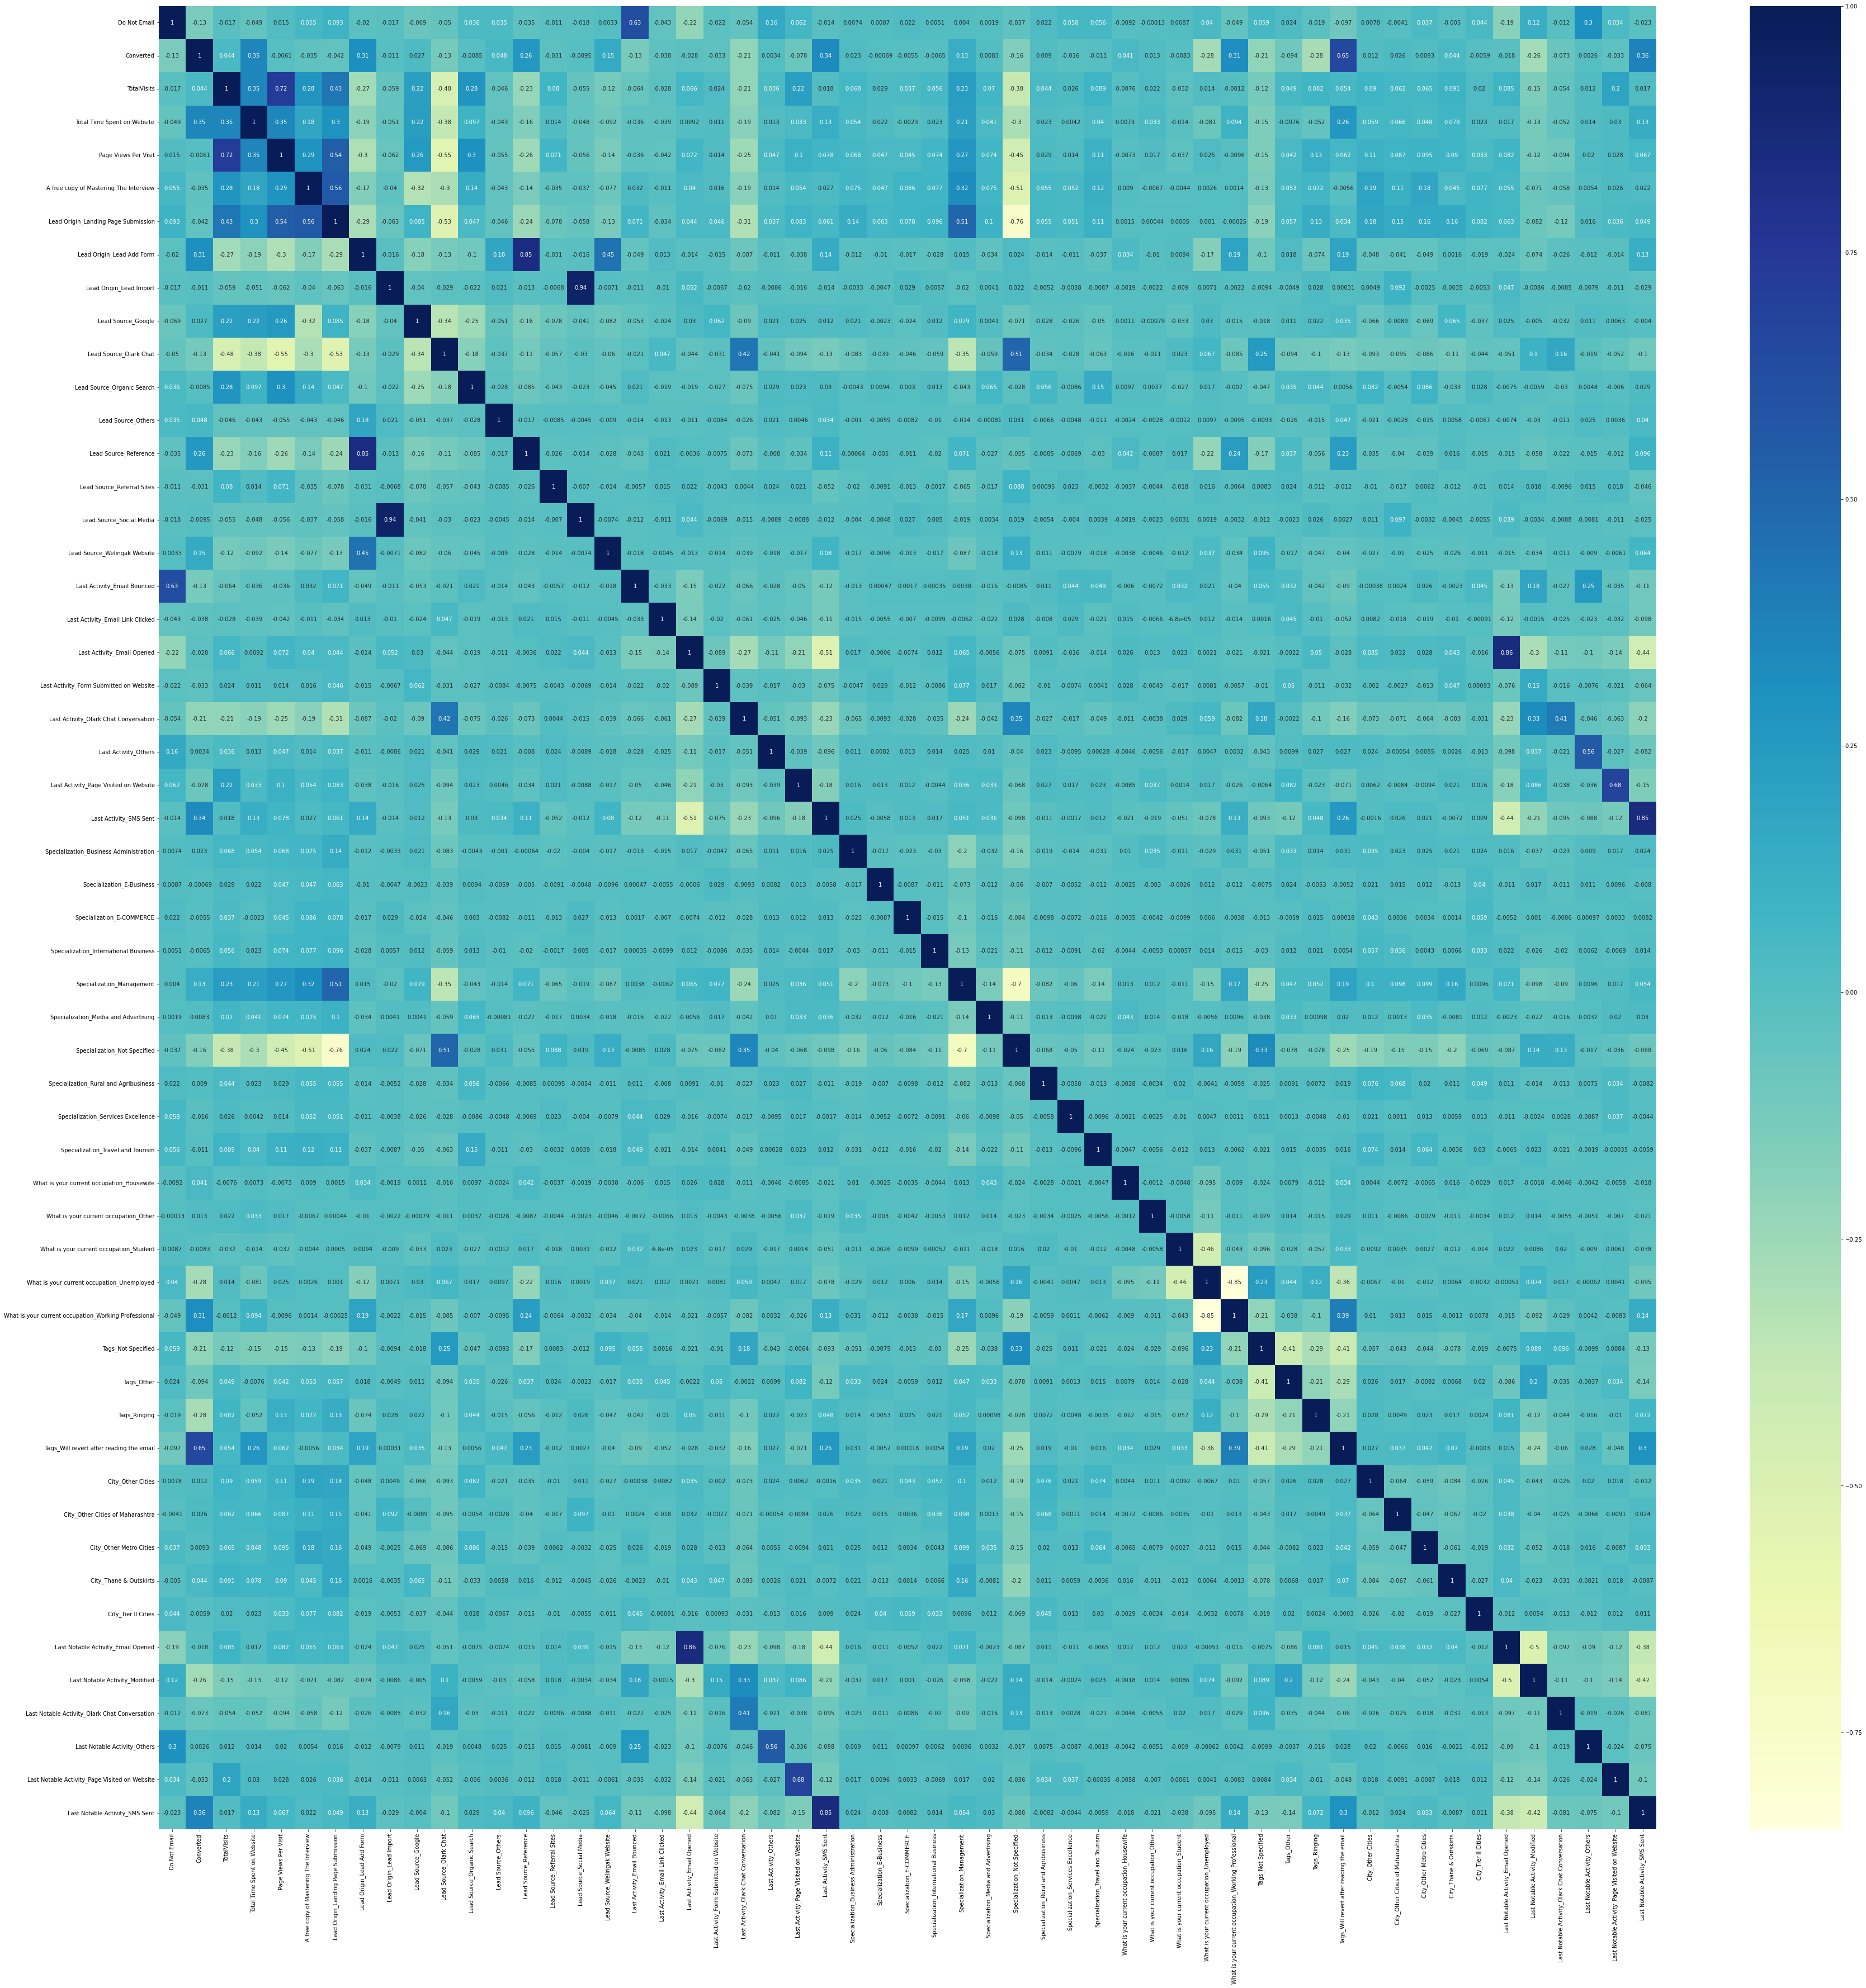

In [81]:
# Checking correlation matrix between variables:
plt.figure(figsize = (60,60))
sns.heatmap(df_1.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Test-Train Split:

In [82]:
# Assigning independent variables to X axis:
X = df_1.drop("Converted", axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [83]:
# Assigning Dependent Variable to y axis:
y = df_1["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [84]:
# Splitting the data into train and test data set:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling:

In [85]:
# Defining StandardScaler in scalar variable:
scaler = StandardScaler()

In [86]:
# Creating list of continuous numerical variables:
con_vars = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]

# Scaling Variables:
X_train[con_vars] = scaler.fit_transform(X_train[con_vars])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,0,0.668862,1.848117,1.455819,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4696,0,-0.030697,-0.037832,0.399961,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3274,0,0.319082,-0.642138,-0.127967,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2164,0,-0.380477,-0.154676,-0.127967,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1667,0,0.319082,1.258415,-0.481679,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


### Step 3: Building Model.
- Building Logistic Regression Model using mixed approach for feature selection i.e "RFE" & Manual elimination of variables.
- Building a model with good Accuracy.

In [87]:
# Running first model with all the variables to check efficiency of model:
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6212
Model Family:                Binomial   Df Model:                           54
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1586.8
Date:                Wed, 13 Jul 2022   Deviance:                       3173.6
Time:                        21:32:29   Pearson chi2:                 7.00e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.6957      1.766     -3.225      0.001      -9.157      -2.234
Do Not Email                                            -1.2525      0.274     -4.564      0.000      -1.790      -0.715
TotalVisits                                              0.3094      0.066      4.709      0.000       0.181       0.438
Total Time Spent on Website                              1.0927      0.053     20.427      0.000       0.988       1.198
Page Views Per Visit                                    -0.4008      0.081     -4.944      0.000      -0.560      -0.242
A free copy of Mastering The Interview                  -0.0731      0.152     -0.482      0.630      -0.370       0.224
Lead Origin_Landing Page Submission                     -0.2875      0.190     -1.514      0.130      -0.660       0.085
Lead Origin_Lead Add Form                                1.9066      1.082      1.763      0.078      -0.213       4.026
Lead Origin_Lead Import                                 22.1012   2.88e+04      0.001      0.999   -5.65e+04    5.65e+04
Lead Source_Google                                       0.1583      0.158      1.001      0.317      -0.152       0.468
Lead Source_Olark Chat                                   1.1173      0.215      5.186      0.000       0.695       1.540
Lead Source_Organic Search                               0.1714      0.183      0.939      0.348      -0.186       0.529
Lead Source_Others                                       1.4287      0.854      1.673      0.094      -0.245       3.103
Lead Source_Reference                                    1.9337      1.130      1.712      0.087      -0.280       4.148
Lead Source_Referral Sites                              -0.5549      0.448     -1.239      0.215      -1.433       0.323
Lead Source_Social Media                               -21.3270   2.88e+04     -0.001      0.999   -5.65e+04    5.65e+04
Lead Source_Welingak Website                             4.6083      1.488      3.097      0.002       1.692       7.524
Last Activity_Email Bounced                              0.2591      0.554      0.468      0.640      -0.826       1.344
Last Activity_Email Link Clicked                         0.8517      0.480      1.774      0.076      -0.089       1.793
Last Activity_Email Opened                               1.3681      0.304      4.494      0.000       0.772       1.965
Last Activity_Form Submitted on Website                  0.8722      0.451      1.936      0.053      -0.011       1.755
Last Activity_Olark Chat Conversation                   -0.4623      0.345     -1.338      0.181      -1.139       0.215
Last Activity_Others                                     1

- This model does not look good enough. Now, we will eliminate features by using RFE method and will be left with 20 features which will be removed manually one by one for significant model by checking their **p-values** and **VIF value.**

In [88]:
# By using RFE(Recursive Feature Elimination) we will eliminate features and will be left with 20 variables:
logreg = LogisticRegression()

# Using RFE and decreasing variables to 20:
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [89]:
# List of variables which are supported by RFE:
rfe.support_

array([ True, False,  True, False, False, False,  True,  True, False,
        True, False, False,  True, False, False,  True, False, False,
        True, False,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True,  True, False, False,  True])

In [90]:
# Check list of variables supported by RFE along with their ranking:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('A free copy of Mastering The Interview', False, 22),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 28),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 27),
 ('Lead Source_Others', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 7),
 ('Lead Source_Social Media', False, 33),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 35),
 ('Last Activity_Email Link Clicked', False, 15),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 6),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 30),
 ('Last Activity_S

In [91]:
# List of variables which are supported by RFE:
supp = X_train.columns[rfe.support_]
supp

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional',
       'Tags_Not Specified', 'Tags_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [92]:
# List of variables which are not supported by RFE:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management', 'Specialization_Media and Advertising',
       'Specialization_Not Specified', 'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupa

#### Building a Classification Model:

- ***Model 1:***

In [93]:
# Building model using statsmodel for detailed statistics:
X_train_m1 = X_train[supp]

In [94]:
# Adding constant:
X_train_sm1 = sm.add_constant(X_train_m1)

# Fitting variables and building model:
logm1 = sm.GLM(y_train,X_train_sm1, family = sm.families.Binomial())
lm_1 = logm1.fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6246
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1623.8
Date:                Wed, 13 Jul 2022   Deviance:                       3247.6
Time:                        21:32:36   Pearson chi2:                 6.73e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.8121      0.736     -7.902      0.000      -7.254      -4.370
Do Not Email                                            -1.2733      0.225     -5.659      0.000      -1.714      -0.832
Total Time Spent on Website                              1.1177      0.052     21.347      0.000       1.015       1.220
Lead Origin_Lead Add Form                                3.4230      0.890      3.848      0.000       1.679       5.167
Lead Origin_Lead Import                                  1.1031      0.726      1.520      0.128      -0.319       2.525
Lead Source_Olark Chat                                   1.3888      0.132     10.483      0.000       1.129       1.648
Lead Source_Reference                                    0.8569      0.934      0.917      0.359      -0.974       2.688
Lead Source_Welingak Website                             3.3929      1.348      2.518      0.012       0.752       6.034
Last Activity_Email Opened                               0.5784      0.146      3.952      0.000       0.292       0.865
Last Activity_Olark Chat Conversation                   -0.9198      0.246     -3.732      0.000      -1.403      -0.437
Last Activity_Others                                     1.0401      0.342      3.038      0.002       0.369       1.711
Last Activity_SMS Sent                                   1.0260      0.207      4.959      0.000       0.621       1.431
Specialization_Travel and Tourism                       -1.1685      0.383     -3.051      0.002      -1.919      -0.418
What is your current occupation_Working Professional     1.4146      0.282      5.016      0.000       0.862       1.967
Tags_Not Specified                                       3.5533      0.726      4.896      0.000       2.131       4.976
Tags_Other                                               3.7438      0.727      5.146      0.000       2.318       5.170
Tags_Ringing                                             0.1203      0.762      0.158      0.875      -1.373       1.614
Tags_Will revert after reading the email                 7.7435      0.744     10.412      0.000       6.286       9.201
Last Notable Activity_Modified                          -0.3084      0.133     -2.311      0.021      -0.570      -0.047
Last Notable Activity_Olark Chat Conversation           -0.5880      0.505     -1.163      0.245      -1.579       0.403
Last Notable Activity_SMS Sent                           1.2996      0.231      5.633      0.000       0.847       1.752
========================================================================================================================
"""

#### Checking Variance Inflation Factor(VIF):
It gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our model.

In [95]:
# Checking VIF of each variable:
vif = pd.DataFrame()
vif['Features'] = X_train_m1.columns
vif['VIF'] = [variance_inflation_factor(X_train_m1.values, i) for i in range(X_train_m1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,16.52
5,Lead Source_Reference,12.63
19,Last Notable Activity_SMS Sent,7.12
10,Last Activity_SMS Sent,7.01
6,Lead Source_Welingak Website,4.69
13,Tags_Not Specified,3.66
7,Last Activity_Email Opened,3.25
16,Tags_Will revert after reading the email,3.21
17,Last Notable Activity_Modified,3.02
14,Tags_Other,2.60


*Now, we will drop variables manually one by one so that we can get a significant model with **p-value < 0.05** & **VIF < 5**.* 

- ***Model 2:***

In [96]:
# Dropping a variable to check model efficiency:
X_train_m2 = X_train_m1.drop("Tags_Ringing", axis = 1)

In [97]:
# Adding constant:
X_train_sm2 = sm.add_constant(X_train_m2)

# Fitting variables and building model:
logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
lm_2 = logm2.fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6247
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1623.8
Date:                Wed, 13 Jul 2022   Deviance:                       3247.7
Time:                        21:32:37   Pearson chi2:                 6.72e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.7050      0.275    -20.729      0.000      -6.244      -5.166
Do Not Email                                            -1.2736      0.225     -5.659      0.000      -1.715      -0.832
Total Time Spent on Website                              1.1177      0.052     21.349      0.000       1.015       1.220
Lead Origin_Lead Add Form                                3.4251      0.890      3.846      0.000       1.680       5.170
Lead Origin_Lead Import                                  1.1035      0.726      1.521      0.128      -0.319       2.526
Lead Source_Olark Chat                                   1.3887      0.132     10.482      0.000       1.129       1.648
Lead Source_Reference                                    0.8575      0.935      0.917      0.359      -0.976       2.691
Lead Source_Welingak Website                             3.3911      1.348      2.515      0.012       0.749       6.033
Last Activity_Email Opened                               0.5785      0.146      3.954      0.000       0.292       0.865
Last Activity_Olark Chat Conversation                   -0.9196      0.246     -3.731      0.000      -1.403      -0.437
Last Activity_Others                                     1.0409      0.342      3.040      0.002       0.370       1.712
Last Activity_SMS Sent                                   1.0264      0.207      4.962      0.000       0.621       1.432
Specialization_Travel and Tourism                       -1.1686      0.383     -3.051      0.002      -1.919      -0.418
What is your current occupation_Working Professional     1.4144      0.282      5.016      0.000       0.862       1.967
Tags_Not Specified                                       3.4455      0.235     14.665      0.000       2.985       3.906
Tags_Other                                               3.6359      0.239     15.212      0.000       3.167       4.104
Tags_Will revert after reading the email                 7.6360      0.289     26.377      0.000       7.069       8.203
Last Notable Activity_Modified                          -0.3081      0.133     -2.309      0.021      -0.570      -0.047
Last Notable Activity_Olark Chat Conversation           -0.5878      0.505     -1.163      0.245      -1.578       0.403
Last Notable Activity_SMS Sent                           1.3014      0.230      5.647      0.000       0.850       1.753
========================================================================================================================
"""

In [98]:
# Checking VIF of each variable:
vif = pd.DataFrame()
vif['Features'] = X_train_m2.columns
vif['VIF'] = [variance_inflation_factor(X_train_m2.values, i) for i in range(X_train_m2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,16.52
5,Lead Source_Reference,12.63
10,Last Activity_SMS Sent,6.83
18,Last Notable Activity_SMS Sent,6.65
6,Lead Source_Welingak Website,4.69
16,Last Notable Activity_Modified,2.61
13,Tags_Not Specified,2.52
15,Tags_Will revert after reading the email,2.39
8,Last Activity_Olark Chat Conversation,2.19
7,Last Activity_Email Opened,2.03


- ***Model 3:***

In [99]:
# Dropping a variable to check model efficiency:
X_train_m3 = X_train_m2.drop("Lead Source_Reference", axis = 1)

In [100]:
# Adding constant:
X_train_sm3 = sm.add_constant(X_train_m3)

# Fitting variables and building model:
logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
lm_3 = logm3.fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6248
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1624.2
Date:                Wed, 13 Jul 2022   Deviance:                       3248.4
Time:                        21:32:37   Pearson chi2:                 6.70e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.7041      0.275    -20.732      0.000      -6.243      -5.165
Do Not Email                                            -1.2840      0.226     -5.687      0.000      -1.726      -0.842
Total Time Spent on Website                              1.1175      0.052     21.345      0.000       1.015       1.220
Lead Origin_Lead Add Form                                4.2058      0.298     14.103      0.000       3.621       4.790
Lead Origin_Lead Import                                  1.1037      0.726      1.521      0.128      -0.318       2.526
Lead Source_Olark Chat                                   1.3885      0.133     10.477      0.000       1.129       1.648
Lead Source_Welingak Website                             2.6117      1.056      2.472      0.013       0.541       4.682
Last Activity_Email Opened                               0.5757      0.146      3.941      0.000       0.289       0.862
Last Activity_Olark Chat Conversation                   -0.9222      0.246     -3.743      0.000      -1.405      -0.439
Last Activity_Others                                     1.0394      0.343      3.034      0.002       0.368       1.711
Last Activity_SMS Sent                                   1.0232      0.207      4.947      0.000       0.618       1.429
Specialization_Travel and Tourism                       -1.1687      0.383     -3.052      0.002      -1.919      -0.418
What is your current occupation_Working Professional     1.4210      0.281      5.053      0.000       0.870       1.972
Tags_Not Specified                                       3.4464      0.235     14.664      0.000       2.986       3.907
Tags_Other                                               3.6412      0.239     15.239      0.000       3.173       4.110
Tags_Will revert after reading the email                 7.6369      0.290     26.377      0.000       7.069       8.204
Last Notable Activity_Modified                          -0.3085      0.133     -2.315      0.021      -0.570      -0.047
Last Notable Activity_Olark Chat Conversation           -0.5862      0.505     -1.160      0.246      -1.576       0.404
Last Notable Activity_SMS Sent                           1.3002      0.230      5.641      0.000       0.848       1.752
========================================================================================================================
"""

In [101]:
# Checking VIF of each variable:
vif = pd.DataFrame()
vif['Features'] = X_train_m3.columns
vif['VIF'] = [variance_inflation_factor(X_train_m3.values, i) for i in range(X_train_m3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_SMS Sent,6.83
17,Last Notable Activity_SMS Sent,6.65
15,Last Notable Activity_Modified,2.60
12,Tags_Not Specified,2.52
14,Tags_Will revert after reading the email,2.39
7,Last Activity_Olark Chat Conversation,2.19
6,Last Activity_Email Opened,2.03
13,Tags_Other,1.91
4,Lead Source_Olark Chat,1.87
2,Lead Origin_Lead Add Form,1.69


- ***Model 4:***

In [102]:
# Dropping a variable to check model efficiency:
X_train_m4 = X_train_m3.drop("Last Notable Activity_SMS Sent", axis = 1)

In [103]:
# Adding constant:
X_train_sm4 = sm.add_constant(X_train_m4)

# Fitting variables and building model:
logm4 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial())
lm_4 = logm4.fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6249
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1640.6
Date:                Wed, 13 Jul 2022   Deviance:                       3281.1
Time:                        21:32:37   Pearson chi2:                 6.56e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.3393      0.264    -20.244      0.000      -5.856      -4.822
Do Not Email                                            -1.2964      0.226     -5.729      0.000      -1.740      -0.853
Total Time Spent on Website                              1.1215      0.052     21.502      0.000       1.019       1.224
Lead Origin_Lead Add Form                                4.2629      0.301     14.160      0.000       3.673       4.853
Lead Origin_Lead Import                                  0.8679      0.717      1.210      0.226      -0.538       2.274
Lead Source_Olark Chat                                   1.3984      0.131     10.647      0.000       1.141       1.656
Lead Source_Welingak Website                             2.5169      1.056      2.384      0.017       0.448       4.586
Last Activity_Email Opened                               0.3922      0.142      2.758      0.006       0.113       0.671
Last Activity_Olark Chat Conversation                   -0.7439      0.246     -3.028      0.002      -1.226      -0.262
Last Activity_Others                                     1.0050      0.347      2.899      0.004       0.325       1.685
Last Activity_SMS Sent                                   1.8309      0.146     12.542      0.000       1.545       2.117
Specialization_Travel and Tourism                       -1.2511      0.379     -3.299      0.001      -1.994      -0.508
What is your current occupation_Working Professional     1.4484      0.284      5.095      0.000       0.891       2.006
Tags_Not Specified                                       3.3360      0.231     14.415      0.000       2.882       3.790
Tags_Other                                               3.5798      0.236     15.156      0.000       3.117       4.043
Tags_Will revert after reading the email                 7.5639      0.288     26.277      0.000       7.000       8.128
Last Notable Activity_Modified                          -0.7675      0.109     -7.061      0.000      -0.981      -0.554
Last Notable Activity_Olark Chat Conversation           -1.0386      0.501     -2.073      0.038      -2.021      -0.056
========================================================================================================================
"""

In [104]:
# Checking VIF of each variable:
vif = pd.DataFrame()
vif['Features'] = X_train_m4.columns
vif['VIF'] = [variance_inflation_factor(X_train_m4.values, i) for i in range(X_train_m4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Tags_Not Specified,2.49
14,Tags_Will revert after reading the email,2.31
7,Last Activity_Olark Chat Conversation,2.11
6,Last Activity_Email Opened,2.03
15,Last Notable Activity_Modified,2.01
9,Last Activity_SMS Sent,1.95
4,Lead Source_Olark Chat,1.87
13,Tags_Other,1.86
2,Lead Origin_Lead Add Form,1.69
1,Total Time Spent on Website,1.41


- ***Model 5:***

In [105]:
# Dropping a variable to check model efficiency:
X_train_m5 = X_train_m4.drop("Lead Origin_Lead Import", axis = 1)

In [106]:
# Adding constant:
X_train_sm5 = sm.add_constant(X_train_m5)

# Fitting variables and building model:
logm5 = sm.GLM(y_train,X_train_sm5, family = sm.families.Binomial())
lm_5 = logm5.fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6250
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1641.2
Date:                Wed, 13 Jul 2022   Deviance:                       3282.5
Time:                        21:32:38   Pearson chi2:                 6.55e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.3370      0.264    -20.242      0.000      -5.854      -4.820
Do Not Email                                            -1.2983      0.226     -5.739      0.000      -1.742      -0.855
Total Time Spent on Website                              1.1165      0.052     21.497      0.000       1.015       1.218
Lead Origin_Lead Add Form                                4.2522      0.301     14.135      0.000       3.663       4.842
Lead Source_Olark Chat                                   1.3883      0.131     10.600      0.000       1.132       1.645
Lead Source_Welingak Website                             2.5169      1.056      2.384      0.017       0.448       4.586
Last Activity_Email Opened                               0.3964      0.142      2.790      0.005       0.118       0.675
Last Activity_Olark Chat Conversation                   -0.7446      0.246     -3.030      0.002      -1.226      -0.263
Last Activity_Others                                     1.0041      0.347      2.896      0.004       0.324       1.684
Last Activity_SMS Sent                                   1.8357      0.146     12.580      0.000       1.550       2.122
Specialization_Travel and Tourism                       -1.2571      0.379     -3.314      0.001      -2.000      -0.514
What is your current occupation_Working Professional     1.4484      0.284      5.102      0.000       0.892       2.005
Tags_Not Specified                                       3.3358      0.231     14.416      0.000       2.882       3.789
Tags_Other                                               3.5781      0.236     15.152      0.000       3.115       4.041
Tags_Will revert after reading the email                 7.5689      0.288     26.298      0.000       7.005       8.133
Last Notable Activity_Modified                          -0.7634      0.109     -7.029      0.000      -0.976      -0.551
Last Notable Activity_Olark Chat Conversation           -1.0310      0.501     -2.059      0.040      -2.013      -0.050
========================================================================================================================
"""

In [107]:
# Checking VIF of each variable:
vif = pd.DataFrame()
vif['Features'] = X_train_m5.columns
vif['VIF'] = [variance_inflation_factor(X_train_m5.values, i) for i in range(X_train_m5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Not Specified,2.49
13,Tags_Will revert after reading the email,2.31
6,Last Activity_Olark Chat Conversation,2.11
5,Last Activity_Email Opened,2.02
14,Last Notable Activity_Modified,2.01
8,Last Activity_SMS Sent,1.95
3,Lead Source_Olark Chat,1.86
12,Tags_Other,1.86
2,Lead Origin_Lead Add Form,1.69
1,Total Time Spent on Website,1.40


- ***Model 6:***

In [108]:
# Dropping a variable to check model efficiency:
X_train_m6 = X_train_m5.drop("Do Not Email", axis = 1)

In [109]:
# Adding constant:
X_train_sm6 = sm.add_constant(X_train_m6)

# Fitting variables and building model:
logm6 = sm.GLM(y_train,X_train_sm6, family = sm.families.Binomial())
lm_6 = logm6.fit()
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1660.6
Date:                Wed, 13 Jul 2022   Deviance:                       3321.1
Time:                        21:32:38   Pearson chi2:                 6.59e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.5183      0.263    -21.022      0.000      -6.033      -5.004
Total Time Spent on Website                              1.1174      0.052     21.672      0.000       1.016       1.218
Lead Origin_Lead Add Form                                4.2642      0.298     14.307      0.000       3.680       4.848
Lead Source_Olark Chat                                   1.4173      0.130     10.870      0.000       1.162       1.673
Lead Source_Welingak Website                             2.4502      1.054      2.324      0.020       0.384       4.517
Last Activity_Email Opened                               0.5833      0.139      4.201      0.000       0.311       0.855
Last Activity_Olark Chat Conversation                   -0.5931      0.244     -2.430      0.015      -1.072      -0.115
Last Activity_Others                                     0.7669      0.334      2.294      0.022       0.112       1.422
Last Activity_SMS Sent                                   1.9261      0.144     13.392      0.000       1.644       2.208
Specialization_Travel and Tourism                       -1.2857      0.371     -3.462      0.001      -2.014      -0.558
What is your current occupation_Working Professional     1.4769      0.283      5.227      0.000       0.923       2.031
Tags_Not Specified                                       3.3152      0.231     14.331      0.000       2.862       3.769
Tags_Other                                               3.5563      0.236     15.092      0.000       3.094       4.018
Tags_Will revert after reading the email                 7.6015      0.288     26.371      0.000       7.037       8.167
Last Notable Activity_Modified                          -0.7573      0.108     -7.031      0.000      -0.968      -0.546
Last Notable Activity_Olark Chat Conversation           -1.0540      0.499     -2.114      0.034      -2.031      -0.077
========================================================================================================================
"""

In [110]:
# Checking VIF of each variable:
vif = pd.DataFrame()
vif['Features'] = X_train_m6.columns
vif['VIF'] = [variance_inflation_factor(X_train_m6.values, i) for i in range(X_train_m6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Not Specified,2.42
12,Tags_Will revert after reading the email,2.30
5,Last Activity_Olark Chat Conversation,2.09
4,Last Activity_Email Opened,1.98
13,Last Notable Activity_Modified,1.97
7,Last Activity_SMS Sent,1.95
2,Lead Source_Olark Chat,1.86
11,Tags_Other,1.84
1,Lead Origin_Lead Add Form,1.69
0,Total Time Spent on Website,1.40


- ***Model 7:***

In [111]:
# Dropping a variable to check model efficiency:
X_train_m7 = X_train_m6.drop("Last Activity_Email Opened", axis = 1)

In [112]:
# Adding constant:
X_train_sm7 = sm.add_constant(X_train_m7)

# Fitting variables and building model:
logm7 = sm.GLM(y_train,X_train_sm7, family = sm.families.Binomial())
lm_7 = logm7.fit()
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1669.7
Date:                Wed, 13 Jul 2022   Deviance:                       3339.4
Time:                        21:32:39   Pearson chi2:                 6.75e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.0627      0.237    -21.342      0.000      -5.528      -4.598
Total Time Spent on Website                              1.1101      0.051     21.685      0.000       1.010       1.210
Lead Origin_Lead Add Form                                4.3016      0.298     14.442      0.000       3.718       4.885
Lead Source_Olark Chat                                   1.4320      0.130     11.005      0.000       1.177       1.687
Lead Source_Welingak Website                             2.4619      1.054      2.336      0.019       0.397       4.527
Last Activity_Olark Chat Conversation                   -0.9199      0.230     -4.007      0.000      -1.370      -0.470
Last Activity_Others                                     0.3774      0.321      1.175      0.240      -0.252       1.007
Last Activity_SMS Sent                                   1.5022      0.099     15.143      0.000       1.308       1.697
Specialization_Travel and Tourism                       -1.2966      0.370     -3.507      0.000      -2.021      -0.572
What is your current occupation_Working Professional     1.4884      0.284      5.237      0.000       0.931       2.045
Tags_Not Specified                                       3.3255      0.232     14.328      0.000       2.871       3.780
Tags_Other                                               3.5460      0.236     15.007      0.000       3.083       4.009
Tags_Will revert after reading the email                 7.5884      0.288     26.374      0.000       7.024       8.152
Last Notable Activity_Modified                          -0.8986      0.103     -8.759      0.000      -1.100      -0.698
Last Notable Activity_Olark Chat Conversation           -1.1958      0.496     -2.410      0.016      -2.168      -0.223
========================================================================================================================
"""

In [113]:
# Checking VIF of each variable:
vif = pd.DataFrame()
vif['Features'] = X_train_m7.columns
vif['VIF'] = [variance_inflation_factor(X_train_m7.values, i) for i in range(X_train_m7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Last Activity_Olark Chat Conversation,1.94
12,Last Notable Activity_Modified,1.94
11,Tags_Will revert after reading the email,1.83
2,Lead Source_Olark Chat,1.82
9,Tags_Not Specified,1.73
1,Lead Origin_Lead Add Form,1.69
6,Last Activity_SMS Sent,1.52
10,Tags_Other,1.43
0,Total Time Spent on Website,1.40
3,Lead Source_Welingak Website,1.36


- ***Model 8:***

In [114]:
# Dropping a variable to check model efficiency:
X_train_m8 = X_train_m7.drop("Last Activity_Others", axis = 1)

In [115]:
# Adding constant:
X_train_sm8 = sm.add_constant(X_train_m8)

# Fitting variables and building model:
logm8 = sm.GLM(y_train,X_train_sm8, family = sm.families.Binomial())
lm_8 = logm8.fit()
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1670.4
Date:                Wed, 13 Jul 2022   Deviance:                       3340.7
Time:                        21:32:39   Pearson chi2:                 6.75e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.0514      0.237    -21.324      0.000      -5.516      -4.587
Total Time Spent on Website                              1.1086      0.051     21.673      0.000       1.008       1.209
Lead Origin_Lead Add Form                                4.2971      0.298     14.429      0.000       3.713       4.881
Lead Source_Olark Chat                                   1.4277      0.130     10.978      0.000       1.173       1.683
Lead Source_Welingak Website                             2.4564      1.054      2.331      0.020       0.391       4.522
Last Activity_Olark Chat Conversation                   -0.9340      0.229     -4.073      0.000      -1.383      -0.484
Last Activity_SMS Sent                                   1.4908      0.099     15.116      0.000       1.298       1.684
Specialization_Travel and Tourism                       -1.2967      0.370     -3.504      0.000      -2.022      -0.571
What is your current occupation_Working Professional     1.4917      0.284      5.249      0.000       0.935       2.049
Tags_Not Specified                                       3.3251      0.232     14.329      0.000       2.870       3.780
Tags_Other                                               3.5455      0.236     15.008      0.000       3.082       4.009
Tags_Will revert after reading the email                 7.5953      0.288     26.400      0.000       7.031       8.159
Last Notable Activity_Modified                          -0.8938      0.102     -8.721      0.000      -1.095      -0.693
Last Notable Activity_Olark Chat Conversation           -1.1895      0.496     -2.397      0.017      -2.162      -0.217
========================================================================================================================
"""

In [116]:
# Checking VIF of each variable:
vif = pd.DataFrame()
vif['Features'] = X_train_m8.columns
vif['VIF'] = [variance_inflation_factor(X_train_m8.values, i) for i in range(X_train_m8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Last Activity_Olark Chat Conversation,1.93
11,Last Notable Activity_Modified,1.92
2,Lead Source_Olark Chat,1.82
10,Tags_Will revert after reading the email,1.82
8,Tags_Not Specified,1.72
1,Lead Origin_Lead Add Form,1.69
5,Last Activity_SMS Sent,1.51
9,Tags_Other,1.42
0,Total Time Spent on Website,1.40
3,Lead Source_Welingak Website,1.36


- ***Model 9:***

In [117]:
# Dropping a variable to check model efficiency:
X_train_m9 = X_train_m8.drop("Last Notable Activity_Olark Chat Conversation", axis = 1)

In [118]:
# Adding constant:
X_train_sm9 = sm.add_constant(X_train_m9)

# Fitting variables and building model:
logm9 = sm.GLM(y_train,X_train_sm9, family = sm.families.Binomial())
lm_9 = logm9.fit()
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1673.6
Date:                Wed, 13 Jul 2022   Deviance:                       3347.2
Time:                        21:32:39   Pearson chi2:                 6.78e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.0466      0.236    -21.352      0.000      -5.510      -4.583
Total Time Spent on Website                              1.0994      0.051     21.607      0.000       1.000       1.199
Lead Origin_Lead Add Form                                4.2632      0.298     14.330      0.000       3.680       4.846
Lead Source_Olark Chat                                   1.4212      0.130     10.943      0.000       1.167       1.676
Lead Source_Welingak Website                             2.4180      1.050      2.303      0.021       0.360       4.476
Last Activity_Olark Chat Conversation                   -1.2370      0.206     -6.003      0.000      -1.641      -0.833
Last Activity_SMS Sent                                   1.4927      0.098     15.171      0.000       1.300       1.686
Specialization_Travel and Tourism                       -1.3067      0.369     -3.539      0.000      -2.030      -0.583
What is your current occupation_Working Professional     1.4889      0.284      5.247      0.000       0.933       2.045
Tags_Not Specified                                       3.3026      0.231     14.277      0.000       2.849       3.756
Tags_Other                                               3.5278      0.236     14.970      0.000       3.066       3.990
Tags_Will revert after reading the email                 7.5836      0.287     26.407      0.000       7.021       8.146
Last Notable Activity_Modified                          -0.8342      0.099     -8.431      0.000      -1.028      -0.640
========================================================================================================================
"""

In [119]:
# Checking VIF of each variable:
vif = pd.DataFrame()
vif['Features'] = X_train_m9.columns
vif['VIF'] = [variance_inflation_factor(X_train_m9.values, i) for i in range(X_train_m9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.82
10,Tags_Will revert after reading the email,1.81
11,Last Notable Activity_Modified,1.78
8,Tags_Not Specified,1.70
1,Lead Origin_Lead Add Form,1.68
4,Last Activity_Olark Chat Conversation,1.57
5,Last Activity_SMS Sent,1.51
9,Tags_Other,1.41
0,Total Time Spent on Website,1.40
3,Lead Source_Welingak Website,1.36


- All variables have a good p- value & VIF. So we need not drop any more variables and we can proceed with making predictions using this model only.

### Step 4: Model Evaluation & Predictions.
- Checking other metrics for model i.e Sensitivity, Specificity, Precision & Recall.
- Optimal Threshold (ROC Curve)
- Making Predictions on Test dataset.

#### Calculating Various Metrics:

In [120]:
# Predicting values for above model:
y_train_pred = lm_9.predict(X_train_sm9).values.reshape(-1)

In [121]:
# Creating a dataframe for predicted values and probablity:
y_train_pred_final = pd.DataFrame({"Converted":y_train.values, "Converted_Prob":y_train_pred})
y_train_pred_final["ProspectID"] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID
0,1,0.179135,9196
1,0,0.026712,4696
2,0,0.277411,3274
3,0,0.022753,2164
4,1,0.980553,1667


In [122]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0:
y_train_pred_final["Predicted"] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID,Predicted
0,1,0.179135,9196,0
1,0,0.026712,4696,0
2,0,0.277411,3274,0
3,0,0.022753,2164,0
4,1,0.980553,1667,1


In [123]:
# Check the overall accuracy:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8942077549066539


In [124]:
# Creating confusion matrix:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3658,  224],
       [ 439, 1946]], dtype=int64)

In [125]:
# Getting values of True/False Positives & True/False Negatives:
TP = confusion[1,1]    # True Positives
TN = confusion[0,0]    # True Negatives
FP = confusion[0,1]    # False Positives
FN = confusion[1,0]    # False Negatives

- Sensitivity: True Positives/(True Positives + False Negatives)
- Specificity: True Negatives/(True Negatives + False Positives)
- Precision: True Positives/(True Positives + False Positives)
- Recall: True Positives/(True Positives + False Negatives)

In [126]:
# Calculating Sensitivity:
sensitivity = TP / float(TP+FN)
print("Sensitivity:", sensitivity)

# Calculating Specificity:
specificity = TN / float(TN+FP)
print("Specificity:", specificity)

Sensitivity: 0.8159329140461216
Specificity: 0.9422977846470891


In [127]:
# Calculating false postive rate - predicting converted when customer does not have converted:
print(FP/ float(TN+FP))

0.05770221535291087


In [128]:
# Calculating Positive predictive value :
print (TP / float(TP+FP))

0.896774193548387


In [129]:
# Calculating Negative predictive value:
print (TN / float(TN+ FN))

0.8928484256773249


In [130]:
# Calculating precision:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.896774193548387

In [131]:
# Calculating recall using stats library:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8159329140461216

#### ROC Curve:

In [132]:
# Defining function to plot ROC curve:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label="ROC curve (area = %0.2f)" % auc_score )
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate or [1 - True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

    return None

In [133]:
# Using defined function to insert parameters required for ROC curve to build:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

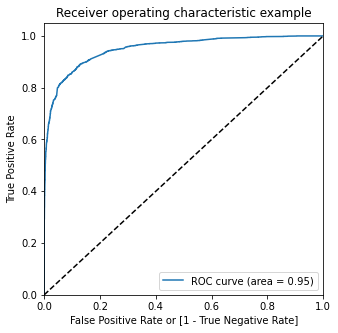

In [134]:
# Instantising ROC curve function:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

- We are getting ROC Curve area of 0.95 which seems to be good for our model.

#### Finding Optimal Cutoff:
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [135]:
# Creating columns with different probability cutoffs: 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.179135,9196,0,1,1,0,0,0,0,0,0,0,0
1,0,0.026712,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.277411,3274,0,1,1,1,0,0,0,0,0,0,0
3,0,0.022753,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.980553,1667,1,1,1,1,1,1,1,1,1,1,1


In [136]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs:
cutoff_df = pd.DataFrame( columns = ["prob","accuracy","sensitivity","specificity"])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.380565     1.000000     0.000000
0.1   0.1  0.756821     0.969392     0.626224
0.2   0.2  0.840753     0.936268     0.782071
0.3   0.3  0.878889     0.882180     0.876868
0.4   0.4  0.888783     0.844444     0.916023
0.5   0.5  0.894208     0.815933     0.942298
0.6   0.6  0.883676     0.755975     0.962133
0.7   0.7  0.877134     0.719916     0.973725
0.8   0.8  0.862295     0.666667     0.982483
0.9   0.9  0.841072     0.598742     0.989954


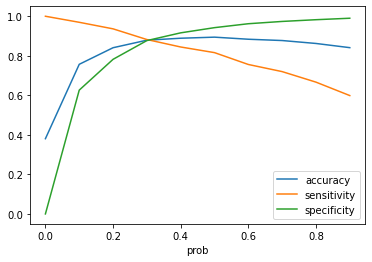

In [137]:
# Plotting accuracy, sensitivity and specificity for various probabilities:
cutoff_df.plot.line(x="prob", y=["accuracy","sensitivity","specificity"])
plt.show()

- From ROC curve, **0.3 is the optimum point to take as a cutoff probability.**

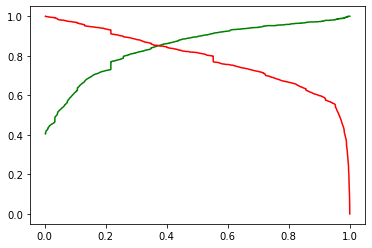

In [138]:
# Calculating probability threshold through precision recall curve:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- From above curve, **0.38 is the optimum point to take as a cutoff probability.**

In [139]:
# Predicting conversion now with optimal threshold which is 0.3:
y_train_pred_final["Final_Predicted"] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,1,0.179135,9196,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.026712,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.277411,3274,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.022753,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.980553,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [140]:
# Check the overall accuracy:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted))

0.8788894207754907


In [141]:
# Creating confusion matrix:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
confusion2

array([[3404,  478],
       [ 281, 2104]], dtype=int64)

In [142]:
# Getting values of True/False Positives & True/False Negatives:
TP = confusion2[1,1]    # True Positives
TN = confusion2[0,0]    # True Negatives
FP = confusion2[0,1]    # False Positives
FN = confusion2[1,0]    # False Negatives

In [143]:
# Calculating Sensitivity:
sensitivity = TP / float(TP+FN)
print("Sensitivity:", sensitivity)

# Calculating Specificity:
specificity = TN / float(TN+FP)
print("Specificity:", specificity)

Sensitivity: 0.8821802935010482
Specificity: 0.8768675940236991


In [144]:
# Calculating false postive rate - predicting converted when customer does not have converted:
print(FP/ float(TN+FP))

0.12313240597630087


In [145]:
# Calculating Positive predictive value :
print (TP / float(TP+FP))

0.814872192099148


In [146]:
# Calculating Negative predictive value:
print (TN / float(TN+ FN))

0.9237449118046133


In [147]:
# Calculating precision:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.814872192099148

In [148]:
# Calculating recall using stats library:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8821802935010482

#### Making Predictions on Test Set:

In [149]:
# Creating list of continuous numerical variables:
con_vars = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]

# Scaling Variables:
X_test[con_vars] = scaler.transform(X_test[con_vars])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7681,0,0.668862,-0.304384,0.135997,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
984,0,-0.030697,-0.538073,0.399961,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8135,1,-0.380477,0.794688,-0.127967,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6915,0,0.319082,-0.614753,-0.127967,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
2712,0,-0.030697,-0.412100,0.399961,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [150]:
# Creating new X_test dataframe by dropping variables from X_test:
newcol = X_train_m9.columns
X_test = X_test[newcol]

In [151]:
# Adding Constant to test set:
X_test_sm = sm.add_constant(X_test)

In [152]:
# Predicting on test set:
y_test_pred = lm_9.predict(X_test_sm)

In [153]:
# Converting y_test_pred to a dataframe which is an array:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7681,0.020064
984,0.006829
8135,0.650729
6915,0.003261
2712,0.889331


In [154]:
# Converting y_test to dataframe:
y_test_df = pd.DataFrame(y_test)

# Putting ProspectID to index:
y_test_df["ProspectID"] = y_test_df.index

In [155]:
# Removing index for both dataframes to append them side by side:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1:
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)
y_pred_final.head()

,Converted,ProspectID,0
0,0,7681,0.020064
1,0,984,0.006829
2,0,8135,0.650729
3,0,6915,0.003261
4,1,2712,0.889331


In [156]:
# Renaming the column:
y_pred_final= y_pred_final.rename(columns={ 0 : "Converted_Prob"})

# Rearranging the columns:
y_pred_final = y_pred_final[["ProspectID","Converted", "Converted_Prob"]]
y_pred_final.head()

,ProspectID,Converted,Converted_Prob
0,7681,0,0.020064
1,984,0,0.006829
2,8135,0,0.650729
3,6915,0,0.003261
4,2712,1,0.889331


In [157]:
# Adding new column predicted:
y_pred_final["final_predicted"] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,ProspectID,Converted,Converted_Prob,final_predicted
0,7681,0,0.020064,0
1,984,0,0.006829,0
2,8135,0,0.650729,1
3,6915,0,0.003261,0
4,2712,1,0.889331,1


In [158]:
# Check the overall accuracy:
print(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

0.8734177215189873


In [159]:
# Creating confusion matrix:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion3

array([[1476,  200],
       [ 140,  870]], dtype=int64)

In [160]:
# Getting values of True/False Positives & True/False Negatives:
TP = confusion3[1,1]    # True Positives
TN = confusion3[0,0]    # True Negatives
FP = confusion3[0,1]    # False Positives
FN = confusion3[1,0]    # False Negatives

In [161]:
# Calculating Sensitivity:
sensitivity = TP / float(TP+FN)
print("Sensitivity:", sensitivity)

# Calculating Specificity:
specificity = TN / float(TN+FP)
print("Specificity:", specificity)

Sensitivity: 0.8613861386138614
Specificity: 0.8806682577565632


In [162]:
# Calculating precision:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8130841121495327

In [163]:
# Calculating recall using stats library:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8613861386138614

### Assigning Lead Score:

In [164]:
# Creating new column lead score to assign lead score to each lead:
y_pred_final["Lead_Score"] = y_pred_final["Converted_Prob"].apply(lambda x: round(x*100))
y_pred_final.head()

,ProspectID,Converted,Converted_Prob,final_predicted,Lead_Score
0,7681,0,0.020064,0,2
1,984,0,0.006829,0,1
2,8135,0,0.650729,1,65
3,6915,0,0.003261,0,0
4,2712,1,0.889331,1,89


### Train set:
- **Accuracy: 87.88%**
- **Sensitivity: 88.21%**
- **Specificity: 87.68%**
- **Precision: 81.48%**
- **Recall: 88.21%**

### Test Set:
- **Accuracy: 87.34%**
- **Sensitivity: 86.13%**
- **Specificity: 88.06%**
- **Precision: 81.30%**
- **Recall: 86.13%**

## Conclusions:

- Accuracy, Sensitivity, Specificity, Precision  Recall score lies in acceptable region so the model we built is reliable.
- Recall is higher than Precision which is good for model.
- This model has an ability to ajust with company's requirements in coming future.
- Top 5 features are:
 - Tags_Will revert after reading the email
 - Lead Origin_Lead Add Form
 - Tags_Other
 - Tags_Not Specified
 - Lead Source_Welingak Website